In [2]:
import numpy as np
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from PyQt5 import uic, QtWidgets,QtCore
from PyQt5.QtCore import Qt
from matplotlib.figure import Figure
from matplotlib.backends.backend_qt5agg import (
    FigureCanvasQTAgg as FigureCanvas,
    NavigationToolbar2QT as NavigationToolbar)
from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
qtCreatorFile = "dnd.ui" # Enter file here.

Ui_MainWindow, QtBaseClass = uic.loadUiType(qtCreatorFile)

class TableModel(QtCore.QAbstractTableModel):

    def __init__(self, data):
        super(TableModel, self).__init__()
        self._data = data

    def data(self, index, role):
        if role == Qt.DisplayRole:
            value = self._data.iloc[index.row(), index.column()]
            return str(value)

    def rowCount(self, index):
        return self._data.shape[0]

    def columnCount(self, index):
        return self._data.shape[1]

    def headerData(self, section, orientation, role):
        # section is the index of the column/row.
        if role == Qt.DisplayRole:
            if orientation == Qt.Horizontal:
                return str(self._data.columns[section])

            if orientation == Qt.Vertical:
                return str(self._data.index[section])

In [3]:
class dndcharacters():
    def __init__(self,name,level,HP,initiative):
        self.name = name
        self.Level = level
        self.HP = HP
        self.initiative = np.int(initiative)
        self.currentInit = 0
    
    def rollInit(self):
        self.currentInit= np.int(self.initiative + np.random.randint(1,20))
        
    #def damage(self):
        
    #def heal(self):

In [4]:
class Main(QtWidgets.QMainWindow, Ui_MainWindow):
    def __init__(self):
        QtWidgets.QMainWindow.__init__(self)
        Ui_MainWindow.__init__(self)
        self.setupUi(self)
        
        self.AllCharacters = []
        self.counter = 0
        self.encounterNum = 1
        self.encounter.clicked.connect(self.encounterInit)
        self.encounterRun.clicked.connect(self.encounterGraph)
        self.roll.clicked.connect(self.roll20)
        self.kill.clicked.connect(self.killCharacter)
        self.folderselect.clicked.connect(self.sFold)

        
        
#         # Notice that an empty figure instance was added to our plotting 
#         # window in the initialization method. This is necessary because 
#         # our first call to changefig will try to remove a previously 
#         # displayed figure, which will throw an error if one is not 
#         # displayed. The empty figure serves as a placeholder so the 
#         # changefig method functions properly.
        
        fig = Figure()
        self.addmpl_3(fig)
        
    def sFold(self):
        #Populates the list with the zip files present in the dir
        self.folder.setText(QtWidgets.QFileDialog.getExistingDirectory())
        
        df = pd.read_excel(os.path.join(self.folder.toPlainText(),"Characters.xlsx"))
                
        self.model = TableModel(df)
        self.TABLE.setModel(self.model)

        header = self.TABLE.horizontalHeader()       
        header.setSectionResizeMode(0, QtWidgets.QHeaderView.Stretch)
        header.setSectionResizeMode(1, QtWidgets.QHeaderView.Stretch)
        header.setSectionResizeMode(2, QtWidgets.QHeaderView.Stretch)
        header.setSectionResizeMode(3, QtWidgets.QHeaderView.Stretch)

    def roll20(self):
        self.lcdNumber.display(np.random.randint(1,20))
            
    def encounterInit(self):
        df_char = pd.read_excel(os.path.join(self.folder.toPlainText(),"Characters.xlsx"))
        Characters = []
        for char in df_char.values.tolist():
            Characters.append(dndcharacters(*char))
        for Character in Characters:
            Character.rollInit()
        Characters = sorted(Characters, key=lambda x:x.currentInit,reverse=True)
        
        df_enemy = pd.read_excel(os.path.join(self.folder.toPlainText(),"Encounter_%s.xlsx"%self.encounterNum))
        Enemys = []
        for enemy in df_enemy.values.tolist():
            Enemys.append(dndcharacters(*enemy))
        for Enemy in Enemys:
            Enemy.rollInit()
        Enemys = sorted(Enemys, key=lambda x:x.currentInit,reverse=True)
        
        AllCharacters = []
        AllCharacters.extend(Characters)
        AllCharacters.extend(Enemys)
        AllCharacters = sorted(AllCharacters, key=lambda x:x.currentInit,reverse=True)
        
        self.counter = 0
        self.encounterNum +=1
        self.AllCharacters = AllCharacters
        self.encounterGraph()
        
    def killCharacter(self):
        print([char.name for char in self.AllCharacters])
        self.AllCharacters.pop(self.counter-1)
        if self.counter == 0:
            self.counter = 0
        else:
            self.counter+=-1
        print([char.name for char in self.AllCharacters],self.counter)
        self.encounterGraph()
    
    def encounterUpdate(self):
        
        figx = Figure()
        
        ax = figx.add_axes([0.1,0.1,0.8,0.8])
        ax.set_title("Combat Tracker")
        ax.grid() 
        barlist= ax.bar([Char.name for Char in self.AllCharacters],[Char.currentInit for Char in self.AllCharacters])
        ax.set_ylim((0,30))
        barlist[self.counter].set_color('r')
        
        ax.set_xlabel("Character")     
        ax.set_ylabel("Initiative")
        
        
        
#         ax1f1 = figx.add_subplot(111,projection='3d')##figx.gca(projection='3d')
#         ax1f1.plot_surface(X,Y,Z.T, rstride=1, cstride=1, linewidth=0.1)
        
        self.rmmpl_3()
        self.addmpl_3(figx)
    
    def encounterGraph(self):
        
        ##Update Box##
        self.Character.setText(self.AllCharacters[self.counter].name)
        self.HP.display(self.AllCharacters[self.counter].HP)
        self.Level.display(self.AllCharacters[self.counter].Level)
        
        
        
        figx = Figure()
        ax = figx.add_axes([0.1,0.1,0.8,0.8])
        ax.set_title("Combat Tracker")
        ax.grid() 
        barlist= ax.bar([Char.name for Char in self.AllCharacters],[Char.currentInit for Char in self.AllCharacters])
        ax.set_ylim((0,30))
        barlist[self.counter].set_color('r')
        if self.counter + 1 == len(self.AllCharacters):
            self.counter = 0
        else:
            self.counter +=1
        ax.set_xlabel("Character")     
        ax.set_ylabel("Initiative")
        
        
        
#         ax1f1 = figx.add_subplot(111,projection='3d')##figx.gca(projection='3d')
#         ax1f1.plot_surface(X,Y,Z.T, rstride=1, cstride=1, linewidth=0.1)
        
        self.rmmpl_3()
        self.addmpl_3(figx)
        
    def addmpl_3(self, fig):
        self.canvas3 = FigureCanvas(fig)
        self.mplvl_3.addWidget(self.canvas3)
        self.canvas3.draw()
        self.toolbar3 = NavigationToolbar(self.canvas3, 
                self.mplwindow_3, coordinates=True)
        self.mplvl_3.addWidget(self.toolbar3)        
        
    def rmmpl_3(self):
        self.mplvl_3.removeWidget(self.canvas3)
        self.canvas3.close()
        self.mplvl_3.removeWidget(self.toolbar3)
        self.toolbar3.close()
        
if __name__ == '__main__':
    app = QtWidgets.QApplication(sys.argv)
    app.aboutToQuit.connect(app.deleteLater)
    window = Main()
    window.show()
    app.exec_()

In [1]:
QtWidgets.QLCDNumber.value()

NameError: name 'QtWidgets' is not defined

In [197]:
class dndcharacters():
    def __init__(self,name,level,HP,initiative):
        self.name = name
        self.level = level
        self.HP = HP
        self.initiative = np.int(initiative)
        self.currentInit = 0
    
    def rollInit(self):
        self.currentInit= np.int(self.initiative + np.random.randint(1,20))
        
    #def damage(self):
        
    #def heal(self):
        

In [215]:
df_char = pd.read_excel("Session/Characters.xlsx")
Characters = []
for char in df_char.values.tolist():
    Characters.append(dndcharacters(*char))
for Character in Characters:
    Character.rollInit()
Characters = sorted(Characters, key=lambda x:x.currentInit,reverse=True)

In [216]:
df_enemy = pd.read_excel("Session/Encounter_1.xlsx")
Enemys = []
for enemy in df_enemy.values.tolist():
    Enemys.append(dndcharacters(*enemy))
for Enemy in Enemys:
    Enemy.rollInit()
Enemys = sorted(Enemys, key=lambda x:x.currentInit,reverse=True)

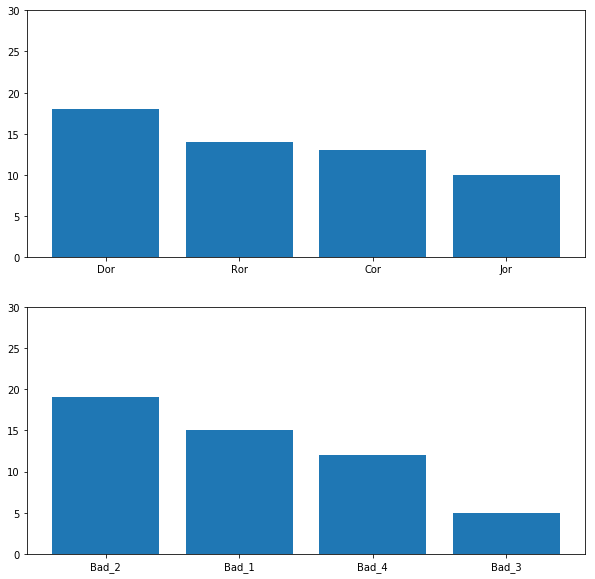

In [217]:
fig = plt.figure(figsize=(10,10))
plt.subplot(211)

plt.bar([Char.name for Char in Characters],[Char.currentInit for Char in Characters])
plt.ylim((0,30))
plt.subplot(212)

plt.bar([Enemy.name for Enemy in Enemys],[Enemy.currentInit for Enemy in Enemys])
plt.ylim((0,30))
plt.show()


In [220]:
AllCharacters = []
AllCharacters.extend(Characters)
AllCharacters.extend(Enemys)
AllCharacters = sorted(AllCharacters, key=lambda x:x.currentInit,reverse=True)

NameError: name 'AllCharacters' is not defined

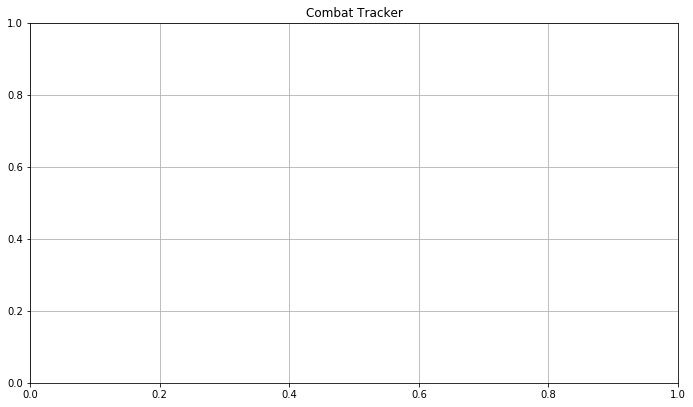

In [5]:
fig = plt.figure(figsize=(9,5))

ax = fig.add_axes([0,0,1,1])
ax.set_title("Combat Tracker")
ax.grid() 
barlist= ax.bar([Char.name for Char in AllCharacters],[Char.currentInit for Char in AllCharacters])
ax.set_ylim((0,30))
barlist[0].set_color('r')
ax.set_xlabel("Character")     
ax.set_ylabel("Initiative")     
plt.show()

In [ ]:
ax.set_